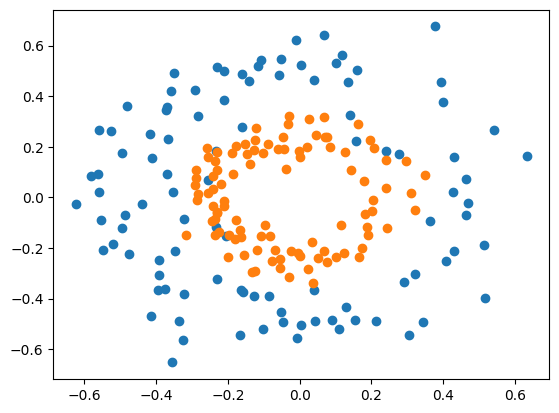

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

angle=np.linspace(-5,5,100)
radius=0.5+0.1*np.random.randn(100)
outer_x=radius*np.cos(angle)
outer_y=radius*np.sin(angle)

radius=0.25+0.05*np.random.randn(100)
inner_x=radius*np.cos(angle)
inner_y=radius*np.sin(angle)
plt.scatter(outer_x,outer_y)
plt.scatter(inner_x,inner_y)



In [ ]:
df1=pd.DataFrame(np.vstack([outer_x,outer_y]).T,columns=["x1","x2"])
df1

,x1,x2
0,0.134640,0.455152
1,0.099957,0.529439
2,0.039707,0.462784
3,-0.009614,0.623484
4,-0.056581,0.483770
...,...,...
95,-0.053194,-0.454814
96,-0.008555,-0.554809
97,0.041828,-0.487505
98,0.091228,-0.483205


In [ ]:
df1['y']=0

In [ ]:
df1.head()

,x1,x2,y
0,0.134640,0.455152,0
1,0.099957,0.529439,0
2,0.039707,0.462784,0
3,-0.009614,0.623484,0
4,-0.056581,0.483770,0


In [ ]:
df2=pd.DataFrame(np.vstack([inner_x,inner_y]).T,columns=["x1","x2"])
df2['y']=1
df2

,x1,x2,y
0,0.070216,0.237366,1
1,0.046295,0.245210,1
2,0.026447,0.308242,1
3,-0.002838,0.184030,1
4,-0.033797,0.288962,1
...,...,...,...
95,-0.024674,-0.210968,1
96,-0.003419,-0.221710,1
97,0.024373,-0.284067,1
98,0.033135,-0.175508,1


In [ ]:
df=pd.concat([df1,df2])
df.head()

,x1,x2,y
0,0.134640,0.455152,0
1,0.099957,0.529439,0
2,0.039707,0.462784,0
3,-0.009614,0.623484,0
4,-0.056581,0.483770,0


In [ ]:
X=df[['x1','x2']]
X.head()

,x1,x2
0,0.134640,0.455152
1,0.099957,0.529439
2,0.039707,0.462784
3,-0.009614,0.623484
4,-0.056581,0.483770


In [ ]:
y=df.iloc[:,-1]
y

,y
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,1
97,1
98,1


**Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
X_train.shape,y_train.shape

((140, 2), (140,))

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',random_state=18)

In [ ]:
svc.fit(X_train,y_train)

SVC(kernel='linear', random_state=18)

In [ ]:
y_pred=svc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
con=confusion_matrix(y_test,y_pred)
print('confusion metrics:',con)
report=classification_report(y_test,y_pred)
print('report',report)

confusion metrics: [[28  0]
 [32  0]]
report               precision    recall  f1-score   support

           0       0.47      1.00      0.64        28
           1       0.00      0.00      0.00        32

    accuracy                           0.47        60
   macro avg       0.23      0.50      0.32        60
weighted avg       0.22      0.47      0.30        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


linear is not suited for this problem

# RBF

In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',random_state=18)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
con=confusion_matrix(y_test,y_pred)
print('confusion metrics:',con)
report=classification_report(y_test,y_pred)
print('report',report)

confusion metrics: [[23  5]
 [ 1 31]]
report               precision    recall  f1-score   support

           0       0.96      0.82      0.88        28
           1       0.86      0.97      0.91        32

    accuracy                           0.90        60
   macro avg       0.91      0.90      0.90        60
weighted avg       0.91      0.90      0.90        60



In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='poly',random_state=18,)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
con=confusion_matrix(y_test,y_pred)
print('confusion metrics:',con)
report=classification_report(y_test,y_pred)
print('report',report)

confusion metrics: [[10 18]
 [ 0 32]]
report               precision    recall  f1-score   support

           0       1.00      0.36      0.53        28
           1       0.64      1.00      0.78        32

    accuracy                           0.70        60
   macro avg       0.82      0.68      0.65        60
weighted avg       0.81      0.70      0.66        60



In [ ]:
from sklearn.svm import SVC
svc=SVC(kernel='sigmoid',random_state=18,)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
con=confusion_matrix(y_test,y_pred)
print('confusion metrics:',con)
report=classification_report(y_test,y_pred)
print('report',report)

confusion metrics: [[16 12]
 [18 14]]
report               precision    recall  f1-score   support

           0       0.47      0.57      0.52        28
           1       0.54      0.44      0.48        32

    accuracy                           0.50        60
   macro avg       0.50      0.50      0.50        60
weighted avg       0.51      0.50      0.50        60

